In [34]:
import numpy as np

In [110]:
def make_it_complex(a,b,W):
    a_z = a[:len(a)//2] + 1j * a[len(a)//2:]
    b_z = b[:len(b)//2] + 1j * b[len(b)//2:]
    W_z = W[:len(W)//2] + 1j * W[len(W)//2:]
    return a_z, b_z, W_z



def rbm_phi(s, a, b, W):
    a_z, b_z, W_z = make_it_complex(a,b,W)
    c = np.dot(a_z, s)
    d = 1
    for i in range(len(b_z)):
        d *= np.cosh(b_z[i] + np.dot(W_z[i], s))
        

    return np.exp(c) * d


def rbm_phi_flat(s, a, b, W):
    W = np.reshape(W, (len(b), len(s)))
    return rbm_phi(s, a, b, W)

In [68]:
def o_der_a(s, a, b, W):
    return np.concatenate((s,1j*s))

In [69]:
def o_der_b(s, a, b, W):
    a_z, b_z, W_z = make_it_complex(a,b,W)
    r = np.array([np.tanh(b_z[i] + np.dot(W_z[i], s)) for i in range(len(b_z))])
    return np.concatenate((r,1j*r))

In [70]:
def o_der_W(s, a, b, W):
    a_z, b_z, W_z = make_it_complex(a,b,W)
    r = np.array([[s[k] * np.tanh(b_z[i] + np.dot(W_z[i], s)) for k in range(len(W_z[0]))] for i in range(len(W_z))])
    return np.concatenate((r,1j*r))

In [75]:
# Let's text the derivative functions by comparing them to finite difference approximations.

def finite_diff(f, x, i, h):
    return (f(x + h * np.eye(len(x))[i]) - f(x - h * np.eye(len(x))[i])) / (2 * h)

def finite_diff_grad(f, x, h):
    return np.array([finite_diff(f, x, i, h) for i in range(len(x))])

def test_derivatives():
    a = np.array([0.1, 0.2, 0.3, 0.4])
    b = np.array([0.3, 0.4, 0.7, 0.2])
    W = np.array([[0.5, 0.6], [0.7, 0.8], [0.2, 0.1], [0.3, 0.2]])
    s = np.array([1, -1])


    print("RBM values:")
    print(rbm_phi(s, a, b, W))

    h = 1e-6
    print("Analytical derivatives:")
    print(o_der_a(s, a, b, W)*rbm_phi(s, a, b, W))
    print(o_der_b(s, a, b, W)*rbm_phi(s, a, b, W))
    print(o_der_W(s, a, b, W)*rbm_phi(s, a, b, W).flatten())

    print("Finite difference derivatives:")
    print(finite_diff_grad(lambda x: rbm_phi(s, x, b, W), a, h))
    print(finite_diff_grad(lambda x: rbm_phi(s, a, x, W), b, h))
    print(finite_diff_grad(lambda x: rbm_phi_flat(s, a, b, x), W.flatten(), h))


In [76]:
test_derivatives()



RBM values:
(0.30837783654605666+1.8896645513975734j)
Analytical derivatives:
[ 0.30837784+1.88966455j  0.        +0.j         -1.88966455+0.30837784j
  0.        +0.j        ]
[-0.47129752+2.03778932j -0.04221154+1.69960193j -2.03778932-0.47129752j
 -1.69960193-0.04221154j]
[[-0.47129752+2.03778932j  0.        +0.j        ]
 [-0.04221154+1.69960193j  0.        +0.j        ]
 [-2.03778932-0.47129752j  0.        +0.j        ]
 [-1.69960193-0.04221154j  0.        +0.j        ]]
Finite difference derivatives:
[ 0.30837784+1.88966455j  0.        +0.j         -1.88966455+0.30837784j
  0.        +0.j        ]
[-0.47129752+2.03778932j -0.04221154+1.69960193j -2.03778932-0.47129752j
 -1.69960193-0.04221154j]
[-0.47129752+2.03778932j  0.        +0.j         -0.04221154+1.69960193j
  0.        +0.j         -2.03778932-0.47129752j  0.        +0.j
 -1.69960193-0.04221154j  0.        +0.j        ]


In [111]:
def rbm_phi_theta(s, theta):
    n = len(s)
    m = (len(theta) - 2*n) // (n+1)
    a = theta[:2*n]
    b = theta[2*n:2*n+m]
    W = np.reshape(theta[2*n+m:], (m, n))
    return rbm_phi(s, a, b, W)

def o_der_theta(s, theta):
    n = len(s)
    m = (len(theta) - 2*n) // (n+1)
    a = theta[:2*n]
    b = theta[2*n:2*n+m]
    W = np.reshape(theta[2*n+m:], (m, n))
    return np.concatenate([o_der_a(s, a, b, W), o_der_b(s, a, b, W), o_der_W(s, a, b, W).flatten()])

def grad_rbm_phi_theta(s, theta):
    return o_der_theta(s, theta) * rbm_phi_theta(s, theta)
        




In [78]:
def create_random_state(N):

    phi = 2*np.random.rand(2**N)-1 + 1j * (2*np.random.rand(2**N)-1)
    #normalize phi^2
    phi = phi / np.sqrt(np.vdot(phi, phi))
    return phi



In [44]:
#N,M = 4,2
#theta = 0.01*(2*np.random.rand(N + M*(N+1))-1)
#s = [1,1,1,1]
#print(grad_rbm_phi_theta(s, theta))
#print(finite_diff_grad(lambda x: rbm_phi_theta(s, x),theta,1e-6))




In [80]:
from itertools import chain, combinations

def powerset(iterable):
    s = list(iterable)  # allows duplicate elements
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

def summed_powerset(iterable):
    a = [sum(x) for x in powerset(iterable)]
    dim = len(a[1]) if len(a) > 1 else 0
    a[0] = np.zeros(dim)
    return [x-np.ones(dim) for x in a]

def all_states(N):
    return summed_powerset([2*np.eye(N)[i] for i in range(N)])

print(all_states(4))

[array([-1., -1., -1., -1.]), array([ 1., -1., -1., -1.]), array([-1.,  1., -1., -1.]), array([-1., -1.,  1., -1.]), array([-1., -1., -1.,  1.]), array([ 1.,  1., -1., -1.]), array([ 1., -1.,  1., -1.]), array([ 1., -1., -1.,  1.]), array([-1.,  1.,  1., -1.]), array([-1.,  1., -1.,  1.]), array([-1., -1.,  1.,  1.]), array([ 1.,  1.,  1., -1.]), array([ 1.,  1., -1.,  1.]), array([ 1., -1.,  1.,  1.]), array([-1.,  1.,  1.,  1.]), array([1., 1., 1., 1.])]


In [82]:
def loss(phi, theta):
    # N is log2 of the number of states
    N = int(np.log2(len(phi)))
    l = 0
    general_state = all_states(N)
    length = len(general_state)
    magnitude = np.linalg.norm([rbm_phi_theta(general_state[j], theta) for j in range(length)])
    for i in range(length):
        si = general_state[i]
        l += np.vdot(phi[i] - rbm_phi_theta(si, theta)/magnitude, phi[i] - rbm_phi_theta(si, theta)/magnitude)
    return l.real/2

In [124]:
def diff_loss(phi, theta):
    N = int(np.log2(len(phi)))
    general_state = all_states(N)
    length = len(general_state)
    magnitude = np.linalg.norm([rbm_phi_theta(general_state[j], theta) for j in range(length)])
    d = 0
    for i in range(length):
        si = general_state[i]
        summed_stuff = sum([o_der_theta(general_state[j], theta).real*np.vdot(rbm_phi_theta(general_state[j], theta), rbm_phi_theta(general_state[j], theta)) for j in range(length)])
        d += ((phi[i] - rbm_phi_theta(si, theta)).conjugate() * rbm_phi_theta(si, theta)/magnitude*(summed_stuff/magnitude**2 - o_der_theta(general_state[i], theta))).real
    return d




In [85]:
arraay = np.array([0.7071+ 1j*0.7071])
print(arraay)
print(np.linalg.norm(arraay))

# So the np.linalg.norm correctly takes the complement for the complex numbers.

[0.7071+0.7071j]
0.9999904099540154


In [125]:
N,M = 4,1
phi = create_random_state(N)
theta = 0.01*(2*np.random.rand(2*N + 2*M*(N+1))-1)

print(diff_loss(phi, theta))
print(finite_diff_grad(lambda x: loss(phi, x),theta,1e-6))



print("just rbm")
general_state = all_states(N)
print(general_state[10])

print(grad_rbm_phi_theta(general_state[10], theta))
print()
print(finite_diff_grad(lambda x: rbm_phi_theta(general_state[10], x),theta,1e-6))


[ 2.44013058e-01  4.35195127e-01  2.04192588e-01  3.46534053e-02
 -7.47468180e-03  8.16388801e-02  1.50283619e-01  6.69214877e-02
 -4.70309370e-03 -2.45002499e-03 -3.84230981e-03 -3.47852063e-03
 -5.30072642e-03 -2.24347056e-03 -1.27960962e-04  6.86161039e-04
  1.21840693e-03 -1.06838728e-03]
[ 2.44013058e-01  4.35195127e-01  2.04192588e-01  3.46534054e-02
 -7.47468176e-03  8.16388802e-02  1.50283619e-01  6.69214876e-02
 -4.70309364e-03 -2.45002496e-03 -3.84230975e-03 -3.47852069e-03
 -5.30072641e-03 -2.24347058e-03 -1.27960975e-04  6.86161017e-04
  1.21840688e-03 -1.06838738e-03]
just rbm
[-1. -1.  1.  1.]
[-0.99358706-0.00668347j -0.99358706-0.00668347j  0.99358706+0.00668347j
  0.99358706+0.00668347j  0.00668347-0.99358706j  0.00668347-0.99358706j
 -0.00668347+0.99358706j -0.00668347+0.99358706j -0.00526544+0.0030298j
 -0.0030298 -0.00526544j  0.00526544-0.0030298j   0.00526544-0.0030298j
 -0.00526544+0.0030298j  -0.00526544+0.0030298j   0.0030298 +0.00526544j
  0.0030298 +0.0052654

In [132]:
def gradient_descent(phi, M, learning_rate, max_iter = 10000, autoTerminate = False):
    N = int(np.log2(len(phi)))
    theta = 0.01*(2*np.random.rand(2*N + 2*M*(N+1))-1)
    learned_theta = np.copy(theta)
    losses = []
    iteration = 0
    while True:
        grad = diff_loss(phi, learned_theta)
        
        learned_theta -= learning_rate * grad
        losses.append(loss(phi, learned_theta))
        iteration += 1
        if iteration > max_iter:
            break
        if iteration % 100 == 0:
            print(f"Iteration {iteration}, Loss: {losses[-1]}, Loss Change: {losses[-2] - losses[-1]}")
        if autoTerminate and iteration > max_iter/10 and (losses[-2] - losses[-1] < 1e-6):
            break

    return theta, learned_theta, losses

In [127]:
N, M = 3, 6
phi = create_random_state(N)
print("Initial random phi:", phi)
print("Gradient descent:")
random_theta, new_theta, _ = gradient_descent(phi, M, 0.01,1000)
print(len(random_theta))
print("Initial loss:", loss(phi, random_theta))
print("Initial random theta:", random_theta)
print("Final loss:", loss(phi, new_theta))
print("Final theta:", new_theta)


Initial random phi: [-0.29781152-0.41633906j  0.40318685+0.02951082j  0.3217465 +0.41794916j
 -0.32453598+0.26369885j  0.11160437+0.13769873j -0.02892102-0.07057524j
  0.2195721 -0.13143058j -0.08924117-0.10388896j]
Gradient descent:
Iteration 100, Loss: 0.6916757865512048, Loss Change: 0.0016154647031433322
Iteration 200, Loss: 0.5711586373742807, Loss Change: 0.0008783125427502814
Iteration 300, Loss: 0.5010743480404714, Loss Change: 0.0005805323444015853
Iteration 400, Loss: 0.4482224400791771, Loss Change: 0.0005034647706704809
Iteration 500, Loss: 0.3942545437201004, Loss Change: 0.0006172092677366181
Iteration 600, Loss: 0.3122971518593659, Loss Change: 0.0010801921258459246
Iteration 700, Loss: 0.19758410981103694, Loss Change: 0.0008855889354251467
Iteration 800, Loss: 0.14525622409190175, Loss Change: 0.0003506567039436581
Iteration 900, Loss: 0.11229207057072574, Loss Change: 0.0003227994583477056
Iteration 1000, Loss: 0.07937909290023105, Loss Change: 0.00033877270608977106


In [133]:
import matplotlib.pyplot as plt

def plot_phi_theta(phi, theta, label="phi_theta"):
    N = int(np.log2(len(phi)))
    x = np.linspace(0, len(phi)-1, len(phi))
    general_state = all_states(N)
    length = len(general_state)
    magnitude = np.linalg.norm([rbm_phi_theta(general_state[j], theta) for j in range(length)])
    # for real (fr)
    y = [rbm_phi_theta(general_state[i], theta).real/magnitude for i in range(length)]
    plt.plot(x, y, label=label+"real")
    y = [phi[i].real for i in range(length)]
    plt.plot(x, y, label="phi real")
    plt.legend()
    plt.show()
    y = [rbm_phi_theta(general_state[i], theta).imag/magnitude for i in range(length)]
    plt.plot(x, y, label=label+"imag")
    y = [phi[i].imag for i in range(length)]
    plt.plot(x, y, label="phi imag")
    plt.legend()
    plt.show()


In [ ]:
# plot_phi_theta(phi, random_theta, label = "Initial random theta")
# plot_phi_theta(phi, new_theta, label = "Final theta")
g


Iteration 100, Loss: 0.5274680517600491, Loss Change: 0.0011822523886581005
Iteration 200, Loss: 0.4271108492010089, Loss Change: 0.0007751850181109687
Iteration 300, Loss: 0.3855348537708958, Loss Change: 0.00012426325053649379
Iteration 400, Loss: 0.38051548264782975, Loss Change: 2.212468180018412e-05
Iteration 500, Loss: 0.3789001836094173, Loss Change: 1.2257561184003674e-05
Iteration 600, Loss: 0.37790230880174225, Loss Change: 8.166122554775779e-06
Iteration 700, Loss: 0.3772131938015378, Loss Change: 5.834566856321999e-06
Iteration 800, Loss: 0.3767086879416729, Loss Change: 4.3749788882774254e-06
Iteration 900, Loss: 0.3763233909952244, Loss Change: 3.4018770501687e-06
Iteration 1000, Loss: 0.37601948881256364, Loss Change: 2.7210130935095833e-06
Iteration 1100, Loss: 0.3757736240740974, Loss Change: 2.226098435920143e-06
Iteration 1200, Loss: 0.37557059711785834, Loss Change: 1.8550860214072706e-06
Iteration 1300, Loss: 0.3754000919307736, Loss Change: 1.5697994886210154e-06


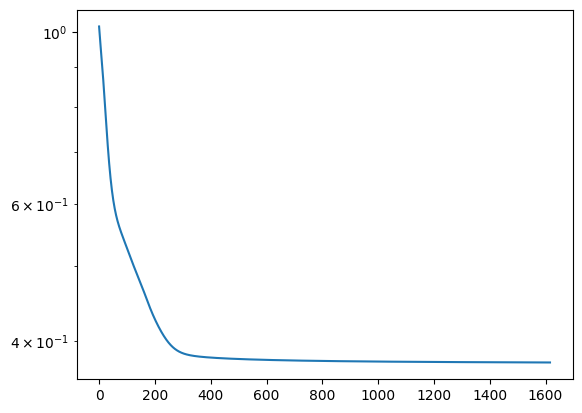

Iteration 100, Loss: 0.4481059115014276, Loss Change: 0.005095340731892106
Iteration 200, Loss: 0.2357180325528554, Loss Change: 0.0006915107312601421
Iteration 300, Loss: 0.18725389488863847, Loss Change: 0.00018202016286253397
Iteration 400, Loss: 0.17862128697830024, Loss Change: 4.184430479789447e-05
Iteration 500, Loss: 0.17478660784060981, Loss Change: 4.2809068376642445e-05
Iteration 600, Loss: 0.16878230765921895, Loss Change: 8.341018961582902e-05
Iteration 700, Loss: 0.15840994001034925, Loss Change: 0.00010146130034721645
Iteration 800, Loss: 0.15224907666262327, Loss Change: 2.8885355206204055e-05
Iteration 900, Loss: 0.15070690084523097, Loss Change: 7.820342562803173e-06
Iteration 1000, Loss: 0.15017816228666647, Loss Change: 3.7735466556221287e-06
Iteration 1100, Loss: 0.14986772136085386, Loss Change: 2.6215366815685037e-06
Iteration 1200, Loss: 0.1496367454374349, Loss Change: 2.050790483848486e-06
Iteration 1300, Loss: 0.1494518717946149, Loss Change: 1.67178609891682

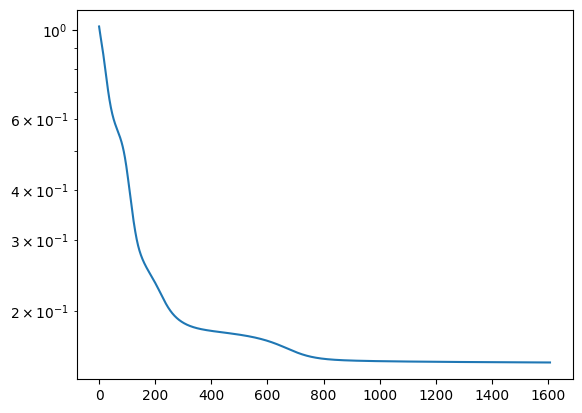

Iteration 100, Loss: 0.3639800680988291, Loss Change: 0.005823142398139303
Iteration 200, Loss: 0.17407487579368192, Loss Change: 0.0006463951479781793
Iteration 300, Loss: 0.12733539294073315, Loss Change: 0.0005901323701547612
Iteration 400, Loss: 0.03836643697710684, Loss Change: 0.0004237324848533064
Iteration 500, Loss: 0.023098603831205374, Loss Change: 5.148115162251568e-05
Iteration 600, Loss: 0.020206726157627572, Loss Change: 1.638825395930063e-05
Iteration 700, Loss: 0.018964677347747753, Loss Change: 1.0244793479857739e-05
Iteration 800, Loss: 0.017993518353438695, Loss Change: 9.582270627781636e-06
Iteration 900, Loss: 0.017000188609852307, Loss Change: 1.0429193981531526e-05
Iteration 1000, Loss: 0.015883872740330894, Loss Change: 1.1964335811492921e-05
Iteration 1100, Loss: 0.01459553846173722, Loss Change: 1.3794009762485224e-05
Iteration 1200, Loss: 0.013132821410631252, Loss Change: 1.5331239085697793e-05
Iteration 1300, Loss: 0.01156661997310234, Loss Change: 1.57078

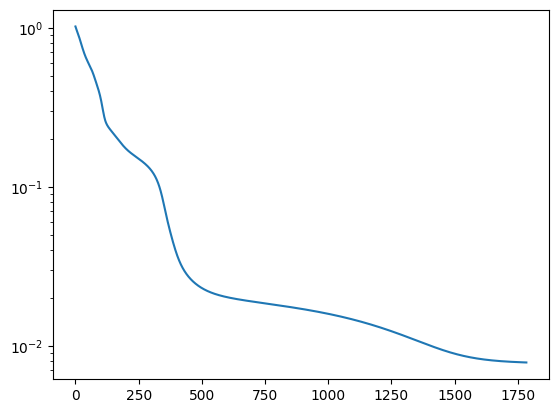

Iteration 100, Loss: 0.3034473340648178, Loss Change: 0.004984033961912271
Iteration 200, Loss: 0.16845527899072937, Loss Change: 0.0004865727382495355
Iteration 300, Loss: 0.09042067077736393, Loss Change: 0.0016397845625024943
Iteration 400, Loss: 0.020210581870159117, Loss Change: 0.00014250375522363232
Iteration 500, Loss: 0.010263608889474756, Loss Change: 7.092690949258608e-05
Iteration 600, Loss: 0.0053517773582757696, Loss Change: 3.043569489034892e-05
Iteration 700, Loss: 0.0034103527582753606, Loss Change: 1.1936382539379231e-05
Iteration 800, Loss: 0.0025767457555391513, Loss Change: 5.83715511404256e-06
Iteration 900, Loss: 0.0021286234904539765, Loss Change: 3.477002634367111e-06
Iteration 1000, Loss: 0.0018424236527214222, Loss Change: 2.381869620870624e-06
Iteration 1100, Loss: 0.0016365904997216179, Loss Change: 1.7953212817409768e-06
Iteration 1200, Loss: 0.0014760786714979454, Loss Change: 1.4457673669203159e-06
Iteration 1300, Loss: 0.0013436808423020283, Loss Change

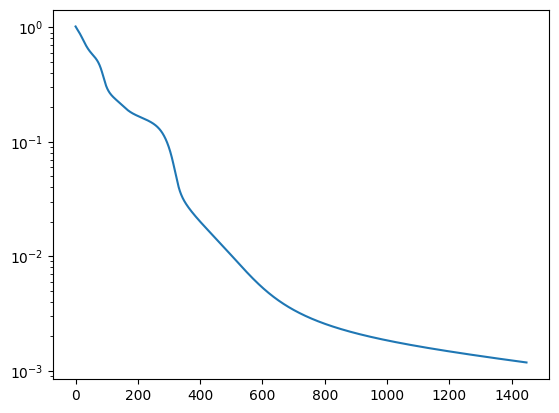

Iteration 100, Loss: 0.321803532906654, Loss Change: 0.0059275506164993
Iteration 200, Loss: 0.16362733938583485, Loss Change: 0.0007266309560679529
Iteration 300, Loss: 0.09117666494801199, Loss Change: 0.00013378081514206497
Iteration 400, Loss: 0.08199048111203952, Loss Change: 7.417493990569124e-05
Iteration 500, Loss: 0.07308622117159681, Loss Change: 0.00012755456121578412
Iteration 600, Loss: 0.04492632164708004, Loss Change: 0.0005009836075709206
Iteration 700, Loss: 0.011880968717846392, Loss Change: 0.00015294857304002513
Iteration 800, Loss: 0.004560309477556332, Loss Change: 3.014896040169461e-05
Iteration 900, Loss: 0.0027874151289449785, Loss Change: 1.1238988935143631e-05
Iteration 1000, Loss: 0.0034935311179999915, Loss Change: 7.777513260125374e-05
Final loss with M = 4: 0.002808846943670718


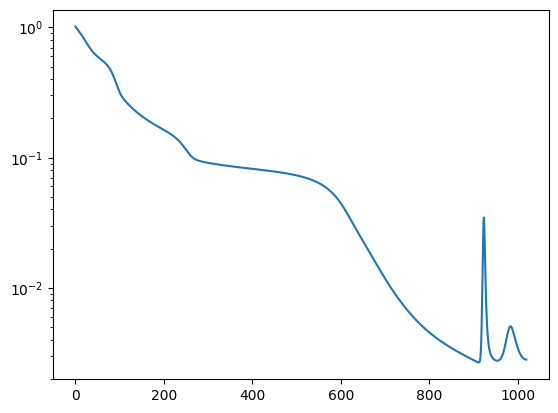

Iteration 100, Loss: 0.287650313317106, Loss Change: 0.0033031972389259145
Iteration 200, Loss: 0.1736058721606415, Loss Change: 0.0006538793448220281
Iteration 300, Loss: 0.08366830736013013, Loss Change: 0.00023722100311521221
Iteration 400, Loss: 0.059322807570974155, Loss Change: 0.0005479063879478344
Iteration 500, Loss: 0.005265905343977557, Loss Change: 6.936748629051293e-05
Iteration 600, Loss: 0.0021119517912260625, Loss Change: 1.2849142537693994e-05
Iteration 700, Loss: 0.001350456406183244, Loss Change: 4.6716217615080935e-06
Iteration 800, Loss: 0.0009967794569588522, Loss Change: 2.7695452700534067e-06
Iteration 900, Loss: 0.0007639540495173827, Loss Change: 1.976540605224319e-06
Iteration 1000, Loss: 0.0005921817984328782, Loss Change: 1.4953613785412528e-06
Iteration 1100, Loss: 0.0004606539774954603, Loss Change: 1.1561104360442481e-06
Final loss with M = 5: 0.00039731093614241733


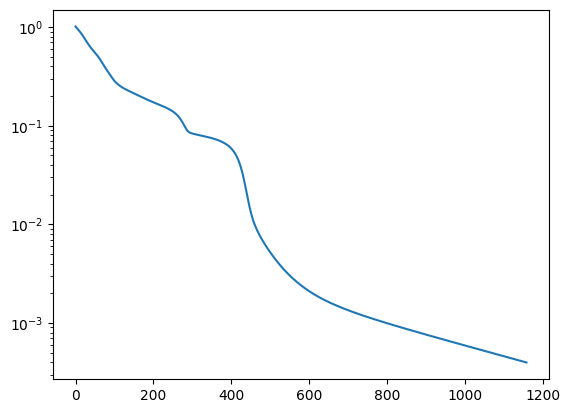

The ratio M/N needed to get a loss below 0.001 is 1.5


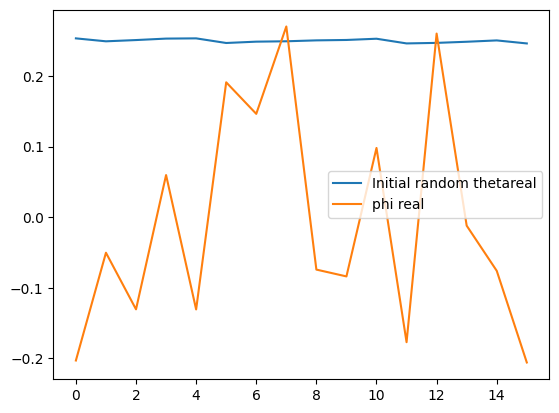

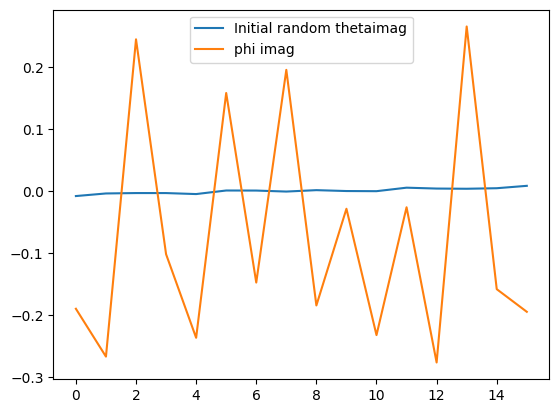

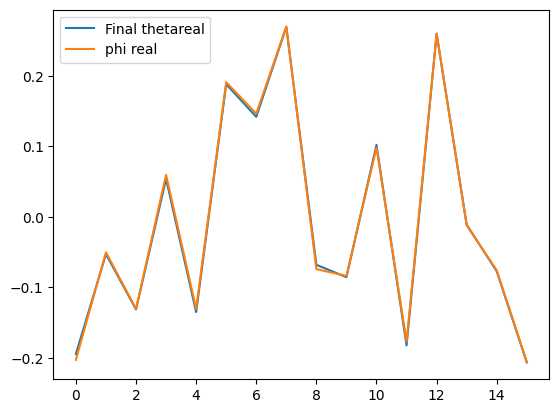

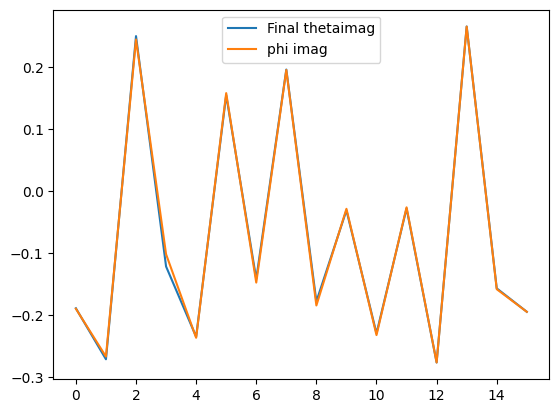

In [134]:
N, M = 4, 0
phi= create_random_state(N)
l = 1
while l > 0.001:
    random_theta, new_theta, losses = gradient_descent(phi, M, 0.1, 10000, autoTerminate=True)
    l = loss(phi, new_theta)
    print(f"Final loss with M = {M}:", l)
    M += 1
    plt.plot(losses)
    plt.yscale("log")
    plt.show()
print("The ratio M/N needed to get a loss below 0.001 is", M/N)
plot_phi_theta(phi, random_theta, label = "Initial random theta")
plot_phi_theta(phi, new_theta, label = "Final theta")